In [1]:
import gudhi as gd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

from pygenstability import plotting
from pygenstability.contrib.optimal_scales import *
from pygenstability.pygenstability import _evaluate_NVI

In [2]:
import sys
from pathlib import Path

module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

from msfiltration import MSF

In [3]:
root_fig = '/home/tc/OneDrive/Software/Markov Stability Filtration/figures/'

In [4]:
#plt.rcParams.update({'font.size': 20})

# Build toy example

In [5]:
small_block = np.array([[0,1,0],[0,0,1],[1,0,0]])

In [6]:
from scipy.linalg import block_diag

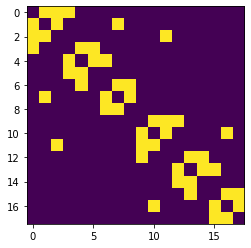

[Text(0.5, 1.0, 'Coarse scale, n=2')]

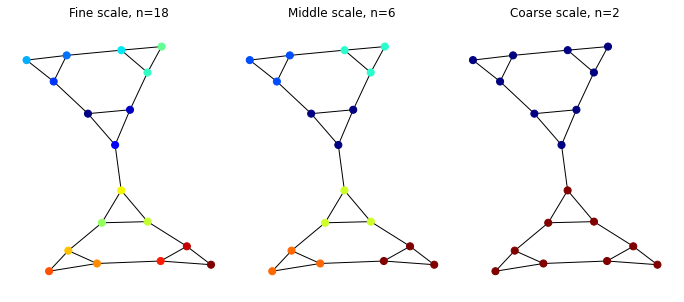

In [7]:
# Fine scale
small_block = np.array([[0,10,0],[0,0,10],[10,0,0]])
A = block_diag(*[small_block for i in range(6)])

# Coarse scale
A[0,3] = 3
A[4,6] = 3
A[7,1] = 3
A[9,12] = 3
A[13,15] = 3
A[16,10] = 3

# Connect components
A[2,11] = 1

# Symmetrise graph
A+=A.transpose()


# binarized
A[A > 0] = 1

# remove self-loops
A -= np.diag(np.diag(A))

# plot matrix
plt.figure()
plt.imshow(A)
#plt.savefig(root_fig +'adjacency_matrix.pdf', bbox_inches='tight')
plt.show()

# ground truth multiscale structure
fine_scale_id = np.arange(18)
middle_scale_id = np.zeros(18)
for i in range(6):
    middle_scale_id[3*i:3*i+3] = i
coarse_scale_id = np.zeros(18)
coarse_scale_id[9:] = 1


# Create nx graph
G = nx.from_numpy_array(A)

# Compute spring layout
pos = nx.layout.spring_layout(G, seed=2)


# Plot multiscale graph structure
fig, axes = plt.subplots(1, 3, figsize=(12, 5))
fig.subplots_adjust(hspace=0.4, wspace=0)


nx.draw(
    G,
    ax=axes[0],
    pos=pos,
    node_size=50,
    arrows=False,
    width=1,
    node_color=fine_scale_id,
    cmap="jet",
)
axes[0].set(title=r"Fine scale, n=18")

nx.draw(
    G,
    ax=axes[1],
    pos=pos,
    node_size=50,
    arrows=False,
    width=1,
    node_color=middle_scale_id,
    cmap="jet",
)
axes[1].set(title=r"Middle scale, n=6")

nx.draw(
    G,
    ax=axes[2],
    pos=pos,
    node_size=50,
    arrows=False,
    width=1,
    node_color=coarse_scale_id,
    cmap="jet",
)
axes[2].set(title=r"Coarse scale, n=2")

# plt.savefig(root_fig +'Multiscale_Structure.pdf', dpi=fig.dpi,bbox_inches='tight')

In [8]:
G.number_of_nodes()

18

In [9]:
G.number_of_edges()

25

# Markov Stability filtration - full OOP framework


In [10]:
# Set MS parameters
n_time = 400
min_time = -1.5
max_time = 1.5

In [11]:
# initialise MSF object
msf = MSF()

# run MS analysis, build filtration and compute PH
msf.fit_transform(A,min_time,max_time,n_time,with_ttprime=True,with_optimal_scales=True)

Running Markov Stability analysis ... 


100%|██████████| 400/400 [00:01<00:00, 200.02it/s]


Building filtration ...


100%|██████████| 400/400 [00:00<00:00, 7626.80it/s]

Computing persistence ... 


### Results from Markov Stability analysis

In [12]:
all_results = msf.ms_results

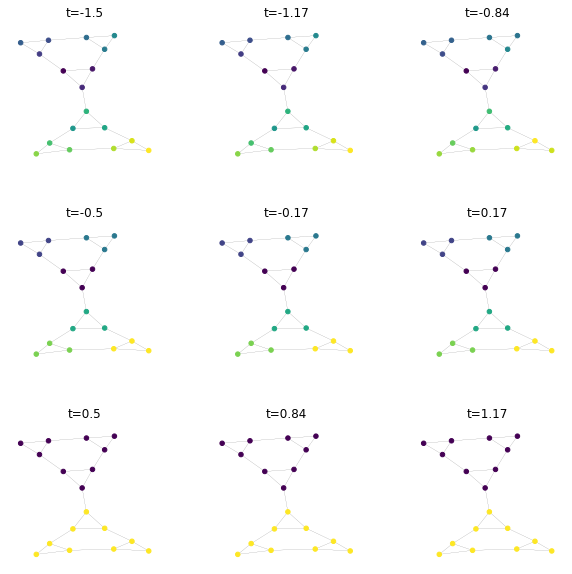

In [13]:
# Get times
times = all_results['times']
log_times = np.log10(all_results['times'])
n_time = all_results["run_params"]["n_time"]

# Get information about communities
community_id = all_results['community_id']
n_communities  = all_results['number_of_communities']

fig, axes = plt.subplots(3, 3, figsize=(10,10))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for i, ax in enumerate(axes.flat):
    
    time = int(i*len(times)/9)
    
    nx.draw(G, ax=ax,pos=pos, node_size = 20, arrows=False, width = 0.1,
            node_color = community_id[time])
    ax.set(title=r't={}'.format(np.around(log_times[time],2)))
plt.show()

[-1.18421053 -0.16917293  0.97368421]


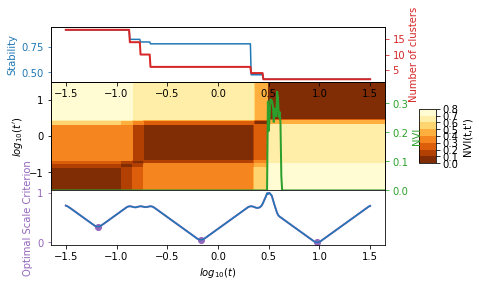

In [14]:
# select optimal scales
identify_optimal_scales(all_results,criterion_threshold=0.2,window_size=10)
selected_scales = log_times[all_results['selected_partitions']]
print(selected_scales)
plotting.plot_scan(all_results)
#plt.savefig(root_fig +'MS_Scan.pdf',bbox_inches='tight')

In [15]:
selected_paritions = all_results['selected_partitions']

n_communities = [len(np.unique(all_results['community_id'][i])) for i in range(len(times))]

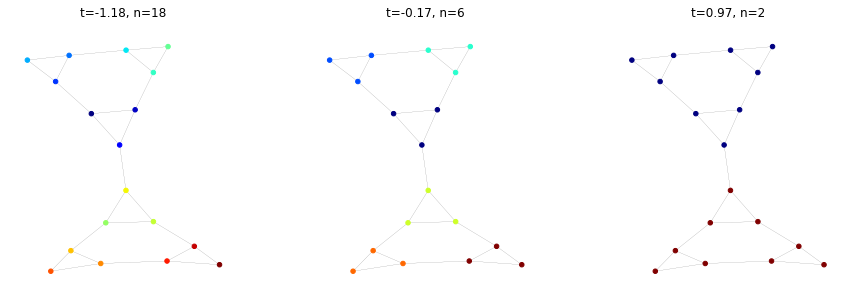

In [16]:
fig, axes = plt.subplots(1, len(selected_paritions), figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for i, ax in enumerate(axes.flat):
    
    time = selected_paritions[i]
    
    nx.draw(G, ax=ax,pos=pos, node_size = 20, arrows=False, width = 0.1,
            node_color = community_id[time],cmap = 'jet')
    ax.set(title=r't={}, n={}'.format(np.around(log_times[time],2), n_communities[time]))

#plt.savefig(root_fig +'Partitions_ScaleCrit.pdf', dpi=fig.dpi,bbox_inches='tight')

### Persistent homology

In [26]:
list(msf.filtration.get_filtration())

[([0], -1.5),
 ([1], -1.5),
 ([2], -1.5),
 ([3], -1.5),
 ([4], -1.5),
 ([5], -1.5),
 ([6], -1.5),
 ([7], -1.5),
 ([8], -1.5),
 ([9], -1.5),
 ([10], -1.5),
 ([11], -1.5),
 ([12], -1.5),
 ([13], -1.5),
 ([14], -1.5),
 ([15], -1.5),
 ([16], -1.5),
 ([17], -1.5),
 ([4, 5], -0.868421052631579),
 ([6, 8], -0.868421052631579),
 ([13, 14], -0.868421052631579),
 ([15, 17], -0.868421052631579),
 ([3, 4], -0.7631578947368421),
 ([3, 5], -0.7631578947368421),
 ([3, 4, 5], -0.7631578947368421),
 ([6, 7], -0.7631578947368421),
 ([7, 8], -0.7631578947368421),
 ([6, 7, 8], -0.7631578947368421),
 ([12, 13], -0.7631578947368421),
 ([12, 14], -0.7631578947368421),
 ([12, 13, 14], -0.7631578947368421),
 ([15, 16], -0.7631578947368421),
 ([16, 17], -0.7631578947368421),
 ([15, 16, 17], -0.7631578947368421),
 ([0, 1], -0.6654135338345866),
 ([0, 2], -0.6654135338345866),
 ([1, 2], -0.6654135338345866),
 ([0, 1, 2], -0.6654135338345866),
 ([9, 10], -0.6654135338345866),
 ([9, 11], -0.6654135338345866),
 ([10

In [17]:
# Select optimal scales
msf.select_scales()

In [23]:
msf.optimal_scales

array([177, 329])

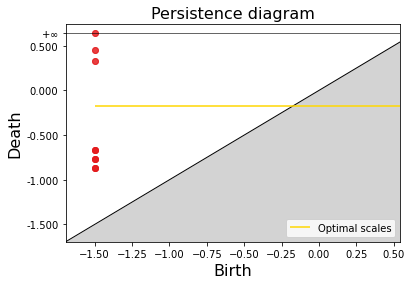

<AxesSubplot:title={'center':'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

In [20]:
msf.plot_persistence_diagram()

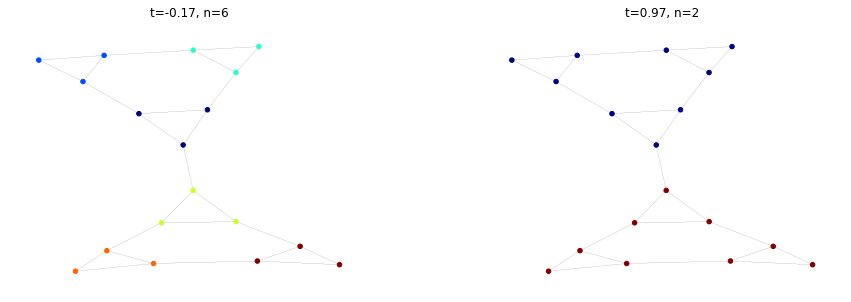

In [21]:
fig, axes = plt.subplots(1, len(msf.optimal_scales), figsize=(15,5))
fig.subplots_adjust(hspace=0.4, wspace=0.3)

for i, ax in enumerate(axes.flat):
    
    time = msf.optimal_scales[i] 
    
    nx.draw(G, ax=ax,pos=pos, node_size = 20, arrows=False, width = 0.1,
            node_color = community_id[time],cmap = 'jet')
    ax.set(title=r't={}, n={}'.format(np.around(log_times[time],2), n_communities[time]))

#plt.savefig(root_fig +'Partitions_PH.pdf', dpi=fig.dpi,bbox_inches='tight')

# Compare optimal partitions to ground truth

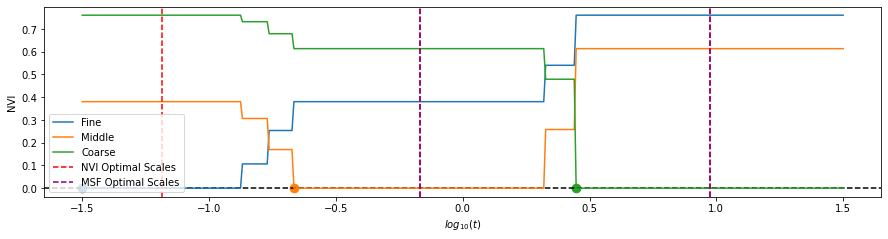

In [24]:
# compare MS partitions to ground truth with NVI
NVI_scores_fine = np.array(
    [
        _evaluate_NVI([0, i], [fine_scale_id] + all_results["community_id"])
        for i in range(1, n_time + 1)
    ]
)
NVI_scores_middle = np.array(
    [
        _evaluate_NVI([0, i], [middle_scale_id] + all_results["community_id"])
        for i in range(1, n_time + 1)
    ]
)
NVI_scores_coarse = np.array(
    [
        _evaluate_NVI([0, i], [coarse_scale_id] + all_results["community_id"])
        for i in range(1, n_time + 1)
    ]
)



# plot lower bound
fig, ax = plt.subplots(1, figsize=(15, 3.5))
ax.axhline(0, c="k", ls="--")

# plot NVI scores
ax.plot(log_times, NVI_scores_fine, label="Fine")
ax.plot(log_times, NVI_scores_middle, label="Middle")
ax.plot(log_times, NVI_scores_coarse, label="Coarse")

# plot minima of NVI scores
ax.scatter(
    log_times[np.argmin(NVI_scores_fine)], NVI_scores_fine.min(), marker=".", s=300
)
ax.scatter(
    log_times[np.argmin(NVI_scores_middle)],
    NVI_scores_middle.min(),
    marker=".",
    s=300,
)
ax.scatter(
    log_times[np.argmin(NVI_scores_coarse)],
    NVI_scores_coarse.min(),
    marker=".",
    s=300,
)


for i in range(len(selected_scales)):
    if i == 0:
        ax.axvline(
            x=selected_scales[i],
            ls="--",
            color="red",
            label="NVI Optimal Scales",
        )
    else:
        ax.axvline(x=selected_scales[i], ls="--", color="red")

for i in range(len(msf.optimal_scales)):
    if i == 0:
        ax.axvline(
            x=log_times[msf.optimal_scales[i]],
            ls="--",
            color="purple",
            label="MSF Optimal Scales",
        )
    else:
        ax.axvline(x=log_times[msf.optimal_scales[i]], ls="--", color="purple")

ax.set(xlabel=r"$log_{10}(t)$", ylabel="NVI")  # yticks = [0.2,0.4,0.6,0.8] )

ax.legend(loc=3)

#plt.savefig(root_fig +'NVI_Comparison.pdf', dpi=fig.dpi,bbox_inches='tight')